<a href="https://colab.research.google.com/github/Skiiidoodle/lung_cancer_detection_ver2/blob/main/lung_cancer_detection2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
warnings.filterwarnings("ignore")

In [20]:
# Load data and put it as dataframe with pandas
df = pd.read_csv('cancer_survey.csv')
count_row = df.shape[0]  # Gives number of rows
count_col = df.shape[1]  # Gives number of cols
print(df.head())
print(f"Number of instances: {count_row}")
print(f"Number of features: {count_col}")

  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0                    2                      

In [21]:
# Load necessary information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

This dataset contain 2 non integer features which we will have to change

In [22]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [23]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

This dataset contain no missing value

In [24]:
df.duplicated().sum()

33

This data contain 33 duplicates

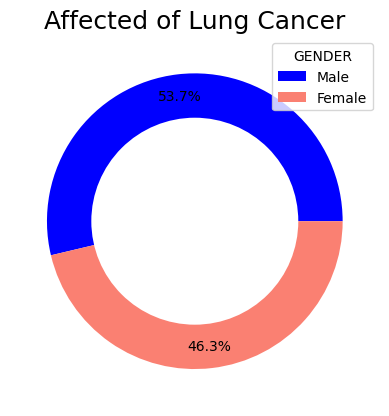

In [25]:
# Select only the gender that affected on lung cancer
male = df[(df['GENDER'] == 'M') & (df['LUNG_CANCER'] == 'YES')].shape[0]
female = df[(df['GENDER'] == 'F') & (df['LUNG_CANCER'] == 'YES')].shape[0]

# Pie chart
plt.pie([male, female], colors=['blue', 'salmon'], pctdistance=0.85, autopct='%1.1f%%')
plt.gca().add_artist(plt.Circle((0, 0), 0.70, fc='white'))

plt.title('Affected of Lung Cancer', size=18)
plt.legend(['Male', 'Female'], loc='upper right', title='GENDER')

plt.show()

Mostly men are affected by lung cancer according to this dataset

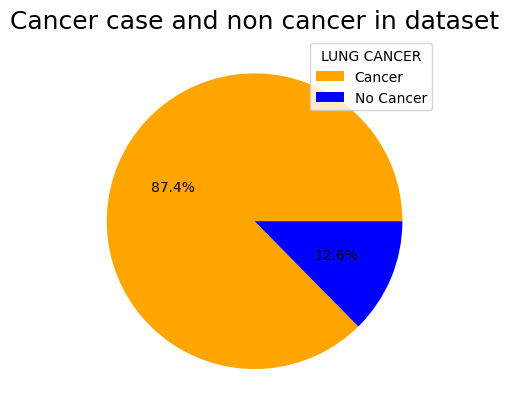

In [26]:
# Select only those affected & not affected of lung cancer who smoke
cancer = df[(df['LUNG_CANCER'] == 'YES')].shape[0]
no_cancer = df[(df['LUNG_CANCER'] == 'NO')].shape[0]

# Pie chart
plt.pie([cancer, no_cancer], colors=['orange', 'blue'], autopct='%1.1f%%')

plt.title('Cancer case and non cancer in dataset', size=18)
plt.legend(['Cancer', 'No Cancer'], loc='upper right', title='LUNG CANCER')

plt.show()

This dataset contain more cancer case than non cancer case

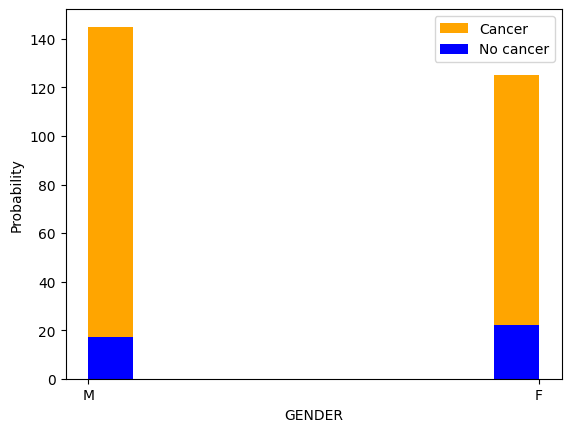

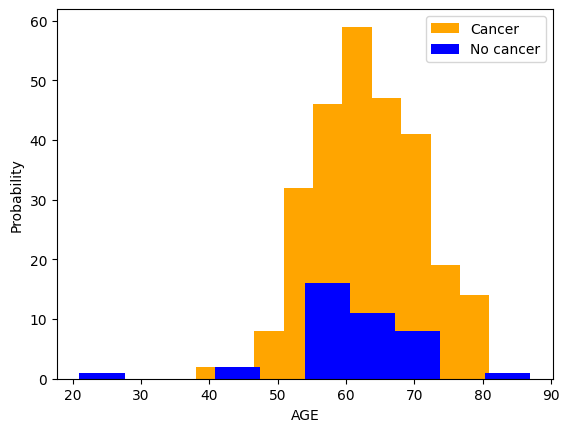

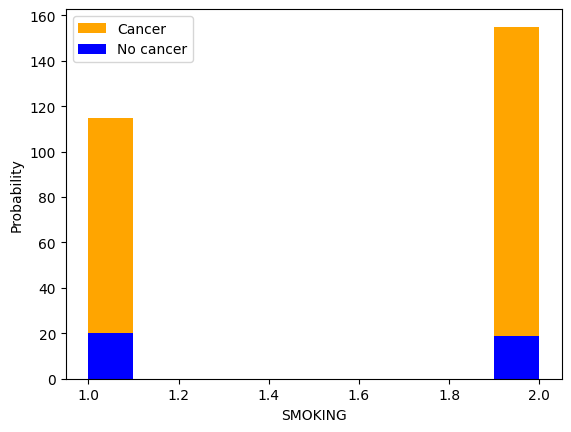

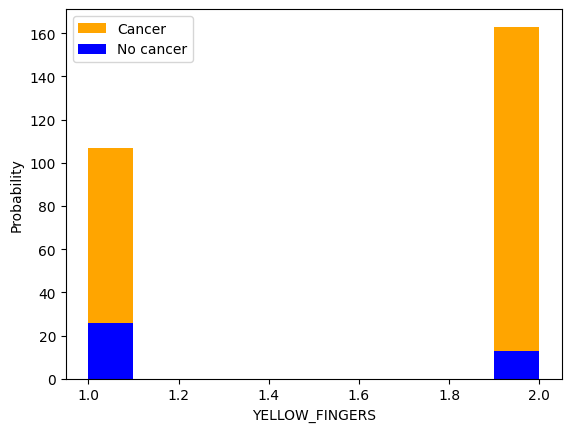

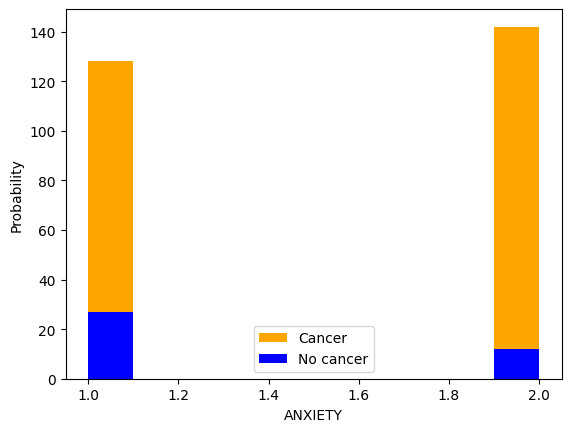

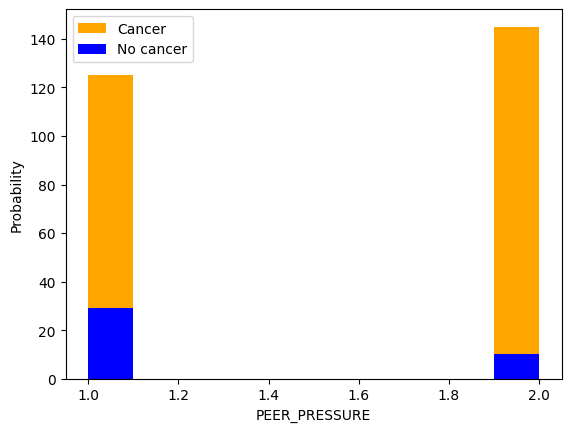

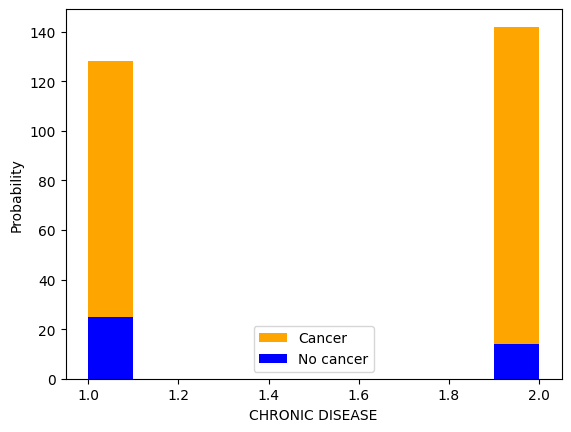

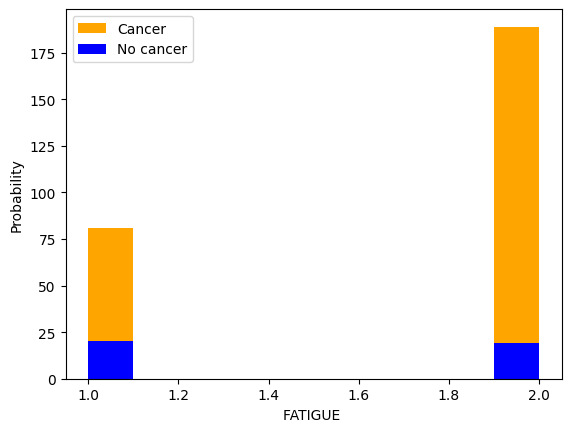

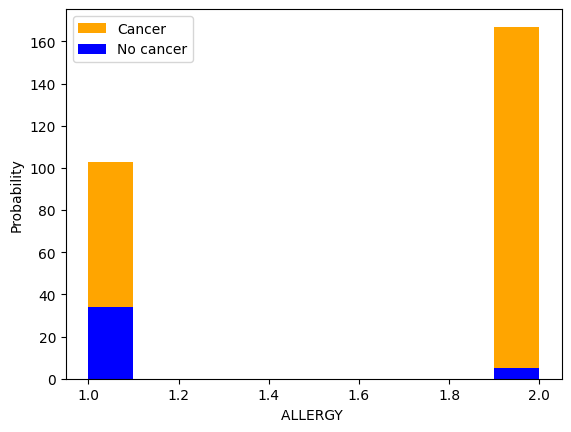

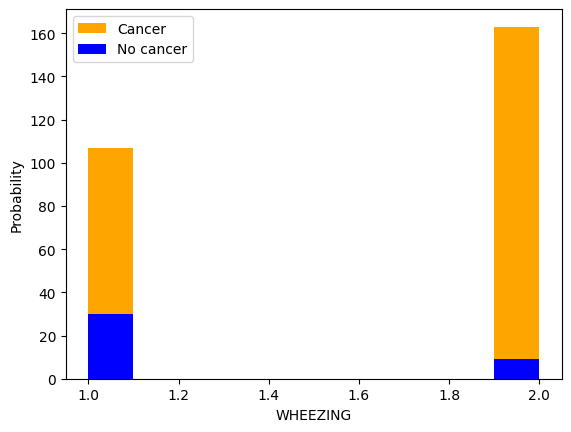

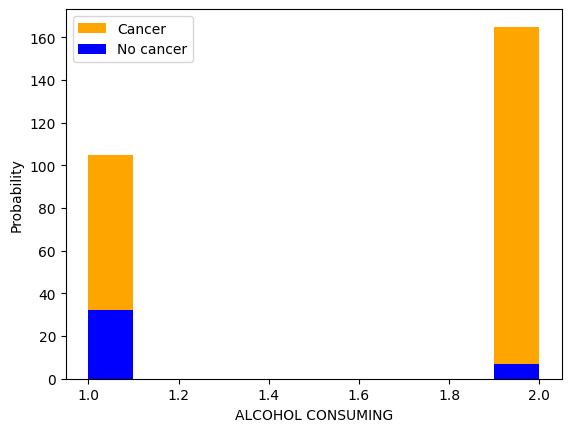

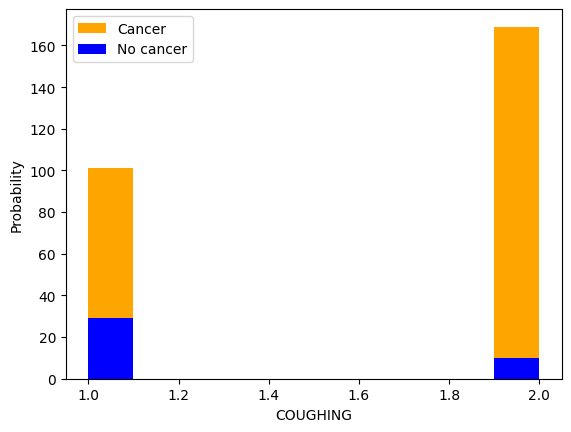

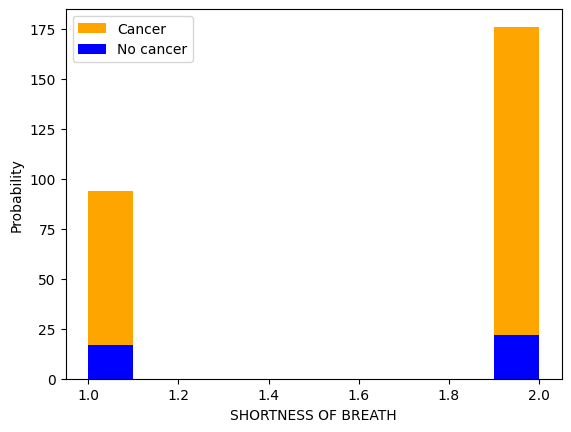

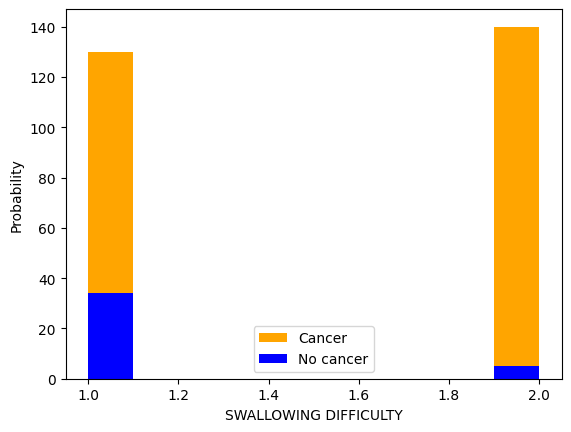

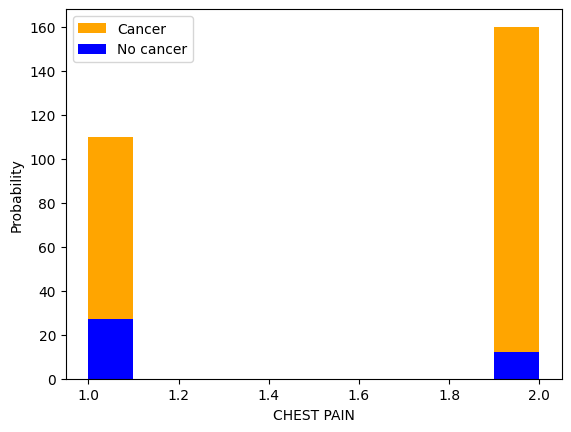

In [27]:
for label in df.iloc[:, :-1]: # Loop through every col except last col
  plt.hist(df[df["LUNG_CANCER"]== "YES"][label], color='orange', label='Cancer')
  plt.hist(df[df["LUNG_CANCER"]== "NO"][label], color='blue', label='No cancer')
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [28]:
# Change any string value into an int type
df['GENDER'].replace({'M': 1, 'F': 2}, inplace = True ) # Swap M and F to 1 and 2
df['LUNG_CANCER'].replace({'YES': 1, 'NO': 0}, inplace = True ) # "YES" to 1 and "NO" to 0
print(df)

     GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0         1   69        1               2        2              1   
1         1   74        2               1        1              1   
2         2   59        1               1        1              2   
3         1   63        2               2        2              1   
4         2   63        1               2        1              1   
..      ...  ...      ...             ...      ...            ...   
304       2   56        1               1        1              2   
305       1   70        2               1        1              1   
306       1   58        2               1        1              1   
307       1   67        2               1        2              1   
308       1   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1                  2     

In [29]:
# Splitting the dataframe to features and target

X = df[df.columns[:-1]].values # X is our feature variable after dropping the column 'LUNG_CANCER'
y = df[df.columns[-1]].values # y will be our target variable


In [30]:
# Splitting the features and target to train and test dataset
# Train 80% and test 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42) # Data splitting will be reproducible

In [31]:
print(f"Train size when LUNG_CANCER = NO: {sum(y_train == 0)}") # Training size for LUNG_CANCER = NO
print(f"Train size when LUNG_CANCER = YES: {sum(y_train == 1)}") # Testing size for LUNG_CANCER = YES

Train size when LUNG_CANCER = NO: 37
Train size when LUNG_CANCER = YES: 210


Using SMOTE to generate synthetic data for imbalance dataset

In [32]:
# Using SMOTE to balance the dataset
smote = SMOTE()
# We oversample the dataset with synthetic data to balance it
X_train, y_train = smote.fit_resample(X_train, y_train)

print(f"LUNG_CANER = NO after using SMOTE {sum(y_train == 0)}")
print(f"LUNG_CANCER = YES after using SMOTE {sum(y_train == 1)}")

LUNG_CANER = NO after using SMOTE 210
LUNG_CANCER = YES after using SMOTE 210


In [33]:
# Load essential libraries for machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
import math
from sklearn import metrics

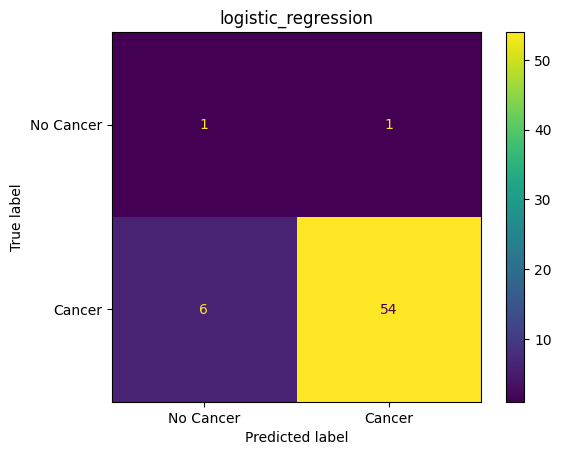

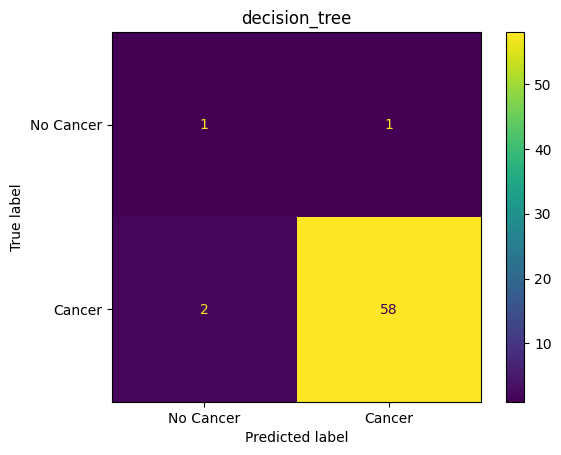

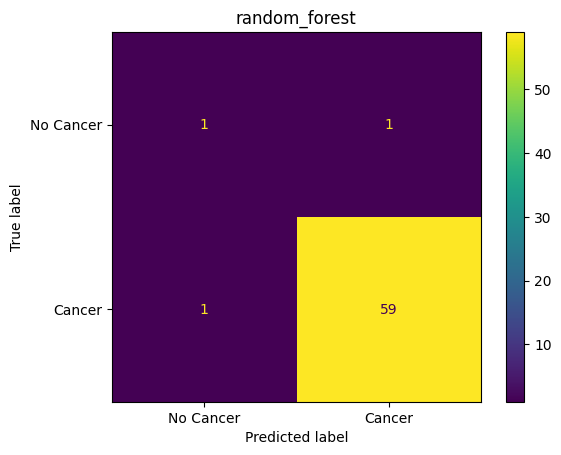

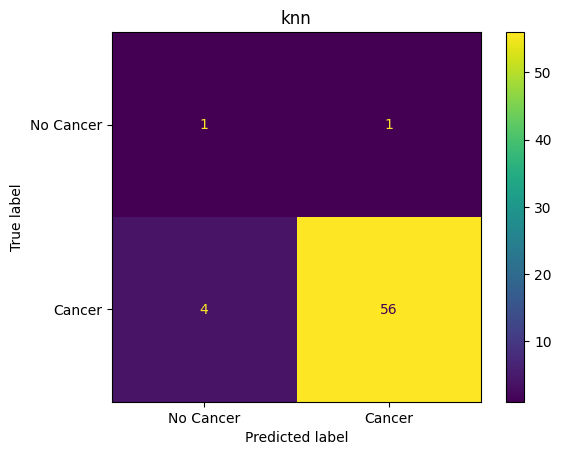

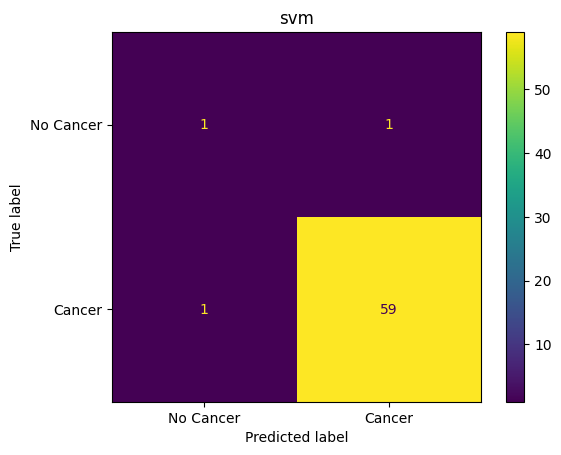

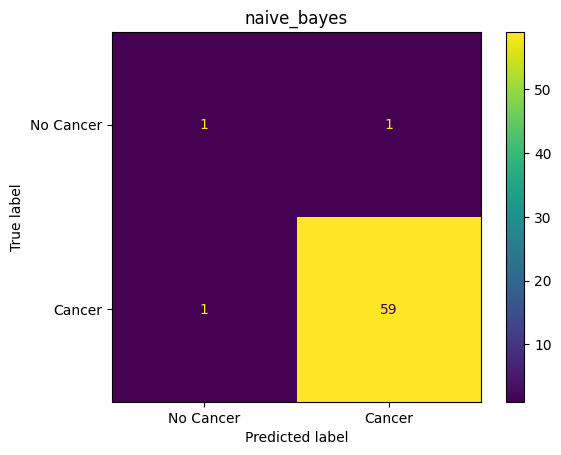

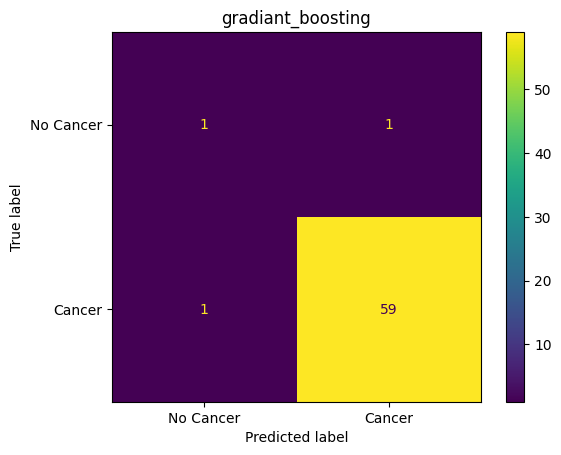

In [34]:
# Classification algorithm
algorithm = {
    'logistic_regression': LogisticRegression(solver='liblinear'),
    'decision_tree': DecisionTreeClassifier(),
    'random_forest': RandomForestClassifier(),
    'knn': KNeighborsClassifier(),
    'svm': SVC(kernel='linear', C=1.0),
    'naive_bayes' : GaussianNB(),
    'gradiant_boosting' : GradientBoostingClassifier(learning_rate=0.1)
}

accuracys = []
precisions = []
recalls = []
f1 = []
matrix = []

# Generate confusion matrix for each model
def model():
    for name, models in algorithm.items():

        models.fit(X_train, y_train)
        predicted = models.predict(X_test)

        accuracys.append(float(f'{accuracy_score(y_test, predicted) * 100:.2f}'))
        precisions.append(float(f'{precision_score(y_test, predicted) * 100:.2f}'))
        recalls.append(float(f'{recall_score(y_test, predicted) * 100:.2f}'))
        f1.append(float(f'{f1_score(y_test, predicted) * 100:.2f}'))

        cm = metrics.confusion_matrix(y_test, predicted)
        cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['No Cancer', 'Cancer'])


        cm_display.plot()
        plt.title(name)
        plt.show()


model()

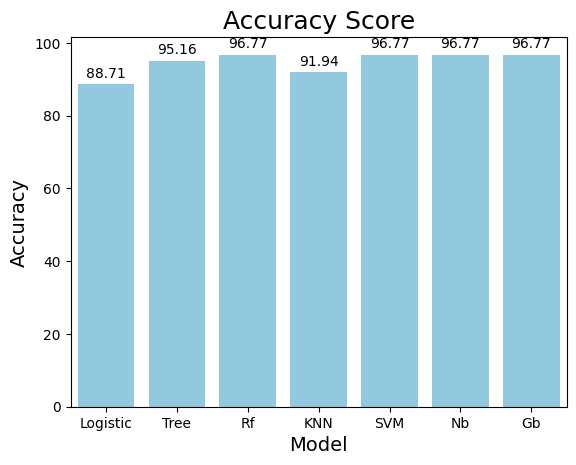

In [95]:
import seaborn as sns
# Visualize the models accuracy
model_name = ['Logistic', 'Tree', 'Rf', 'KNN', 'SVM', 'Nb', 'Gb']

# Bar chart
ax = sns.barplot(x=model_name, y=accuracys, color='skyblue')

# Annotate each bar with its accuracy score
for matrix, accuracy in enumerate(accuracys):
    ax.text(matrix, accuracy + 1, f'{accuracy:.2f}', ha='center', va='bottom')

plt.title('Accuracy Score', size=18)
plt.xlabel('Model', size=14)
plt.ylabel('Accuracy', size=14)

plt.show()

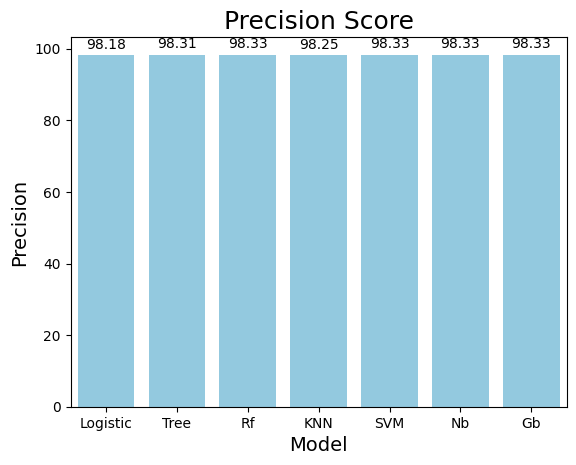

In [36]:
# Visualize the models precision
model_name = ['Logistic', 'Tree', 'Rf', 'KNN', 'SVM', 'Nb', 'Gb']

# Bar chart
ax = sns.barplot(x=model_name, y=precisions, color='skyblue')

# Annotate each bar with its precision score
for matrix, precision in enumerate(precisions):
    ax.text(matrix, precision + 1, f'{precision:.2f}', ha='center', va='bottom')

plt.title('Precision Score', size=18)
plt.xlabel('Model', size=14)
plt.ylabel('Precision', size=14)

plt.show()

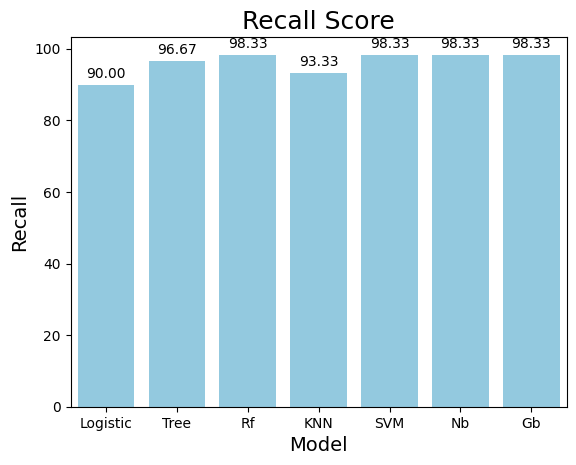

In [37]:
# Visualize the models recall
model_name = ['Logistic', 'Tree', 'Rf', 'KNN', 'SVM', 'Nb', 'Gb']

# Bar chart
ax = sns.barplot(x=model_name, y=recalls, color='skyblue')

# Annotate each bar with its recall score
for matrix, recall in enumerate(recalls):
    ax.text(matrix, recall + 1, f'{recall:.2f}', ha='center', va='bottom')

plt.title('Recall Score', size=18)
plt.xlabel('Model', size=14)
plt.ylabel('Recall', size=14)

plt.show()

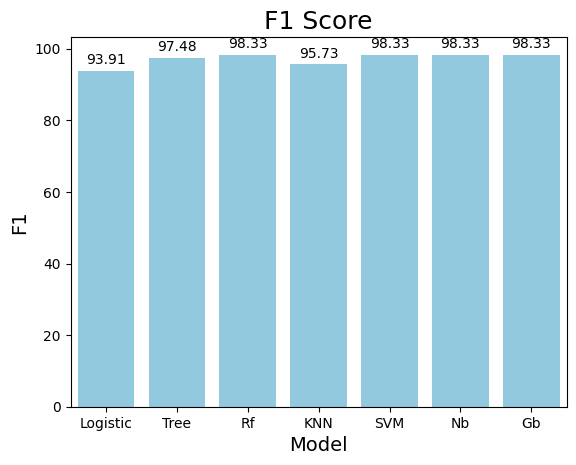

In [38]:
# Visualize the models f1
model_name = ['Logistic', 'Tree', 'Rf', 'KNN', 'SVM', 'Nb', 'Gb']

# Bar chart
ax = sns.barplot(x=model_name, y=f1, color='skyblue')

# Annotate each bar with its f1 score
for matrix, f1 in enumerate(f1):
    ax.text(matrix, f1 + 1, f'{f1:.2f}', ha='center', va='bottom')

plt.title('F1 Score', size=18)
plt.xlabel('Model', size=14)
plt.ylabel('F1', size=14)

plt.show()

In [103]:
# We oversample the dataset with synthetic data to balance it
X2, y2 = smote.fit_resample(X, y)
# Random Forest is one of the best performing model
# So we will use it on K-Fold Cross Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np


# Create a RandomForestClassifier (or any other classifier you want to evaluate)
classifier = RandomForestClassifier()




# Specify the number of folds (e.g., K=5 for 5-fold cross-validation)
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform K-fold cross-validation
cross_val_results = cross_val_score(classifier, X2, y2, cv=k_fold, scoring='accuracy')

# Print the cross-validation results
print("Cross-validation results:", cross_val_results)
print("Mean accuracy:", np.mean(cross_val_results))


Cross-validation results: [0.94444444 0.96296296 0.94444444 0.94444444 0.94444444 0.94444444
 0.98148148 0.92592593 0.96296296 0.98148148]
Mean accuracy: 0.9537037037037036
